In [1]:
import json
from pprint import pprint
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

tasks_filepath = '/Users/aimeebarciauskas/Projects/fomc_pybossa/results/fomc_task.json'
results_filepath = '/Users/aimeebarciauskas/Projects/fomc_pybossa/results/fomc_task_run.json'

with open(tasks_filepath) as data_file:    
    tasks = {}
    raw_tasks = json.load(data_file)
    for task in raw_tasks:
        task_id = task['id']
        tasks[task_id] = task

with open(results_filepath) as data_file:
    results = json.load(data_file)

pprint(tasks[tasks.keys()[0]])
print("\n")
pprint(results[0])

{u'calibration': 0,
 u'created': u'2016-06-24T09:02:59.692012',
 u'id': 1415936,
 u'info': {u'doc1': u'In particular, participants took note of the upturn in orders and shipments of capital goods, and of more upbeat surveys of business conditions.',
           u'doc1id': 480,
           u'doc2': u'While the Committee saw uncertainty regarding the economic outlook as still elevated, it judged that, after this action, the upside risks to inflation roughly balanced the downside risks to growth.',
           u'doc2id': 1181,
           u'nw_score': -17,
           u'question': u'Are these sentences redundant?'},
 u'n_answers': 30,
 u'priority_0': 0.0,
 u'project_id': 3986,
 u'quorum': 0,
 u'state': u'ongoing'}


{u'calibration': None,
 u'created': u'2016-06-24T09:04:25.555895',
 u'finish_time': u'2016-06-24T09:04:40.632654',
 u'id': 2573062,
 u'info': u'No',
 u'project_id': 3986,
 u'task_id': 1415930,
 u'timeout': None,
 u'user_id': None,
 u'user_ip': u'95.23.19.171'}


In [5]:
import enki
import os

# setup the server connection
e = enki.Enki(api_key=os.environ['PYBOSSA_API_KEY'],
                                 endpoint='http://crowdcrafting.org/',
                                 project_short_name='fomc')
# Get all completed tasks and its associated task runs
e.get_all()

In [62]:
for task in e.tasks[0:3]:
    print 'Task id: ' + str(task.id)
    num_answers = e.task_runs_df[task.id]['info'].count()
    print 'Number of answers: ' + str(num_answers)
    times_marked_redundant = e.task_runs_df[task.id]['info'].describe().freq
    print 'Times of marked redundant: ' + str(times_marked_redundant)
    top_answer = e.task_runs_df[task.id]['info'].describe().top
    print 'Top answer: ' + str(top_answer)
    print e.tasks_df['nw_score'][task.id]
    print ''


Task id: 1415930
Number of answers: 6
Times of marked redundant: 6
Top answer: No

Task id: 1415931
Number of answers: 6
Times of marked redundant: 6
Top answer: No

Task id: 1415932
Number of answers: 6
Times of marked redundant: 4
Top answer: No



In [63]:
# seperate into 1's and 0's
redundant_nw_scores = []
not_redundant_nw_scores = []
for task in e.tasks:
    top_answer = e.task_runs_df[task.id]['info'].describe().top
    is_redundant = top_answer == 'Yes'
    if is_redundant:
        redundant_nw_scores.append(e.tasks_df['nw_score'][task.id])
    else:
        nw_score = e.tasks_df['nw_score'][task.id]
        not_redundant_nw_scores.append(nw_score)

print len(redundant_nw_scores)
print len(not_redundant_nw_scores)

19
21


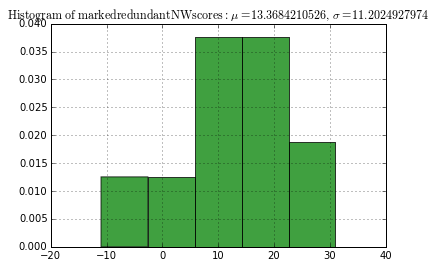

In [67]:
%matplotlib inline

# the histogram of the data
n, bins, patches = plt.hist(redundant_nw_scores, 5, normed=1, facecolor='green', alpha=0.75)
mu_red = np.mean(redundant_nw_scores)
sigma_red = np.std(redundant_nw_scores)
plt.title(r'$\mathrm{Histogram\ of\ marked redundant NW scores:}\ \mu=' + str(mu_red) + ',\ \sigma=' + str(sigma_red) + '$')
# Note: there is a value lower, ths has cut some extremes
plt.grid(True)

plt.show()

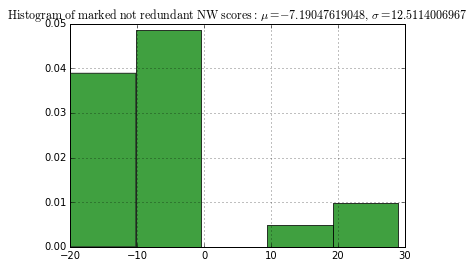

In [66]:
%matplotlib inline

# the histogram of the data
n, bins, patches = plt.hist(not_redundant_nw_scores, 5, normed=1, facecolor='green', alpha=0.75)
mu_nr = np.mean(not_redundant_nw_scores)
sigma_nr = np.std(not_redundant_nw_scores)
plt.title(r'$\mathrm{Histogram\ of\ marked\ not\ redundant\ NW\ scores:}\ \mu='
          + str(mu_nr) + ',\ \sigma=' + str(sigma_nr) + '$')
# Note: there is a value lower, ths has cut some extremes
plt.grid(True)

plt.show()

In [74]:
num_sds = 1
print str(num_sds) + ' standard deviations below the mean for redundant docs: ' + str(mu_red - num_sds*sigma_red)
print str(num_sds) + ' standard deviations above the mean for not redundant docs: ' + str(mu_nr + num_sds*sigma_nr)

1 standard deviations below the mean for redundant docs: 2.16592825525
1 standard deviations above the mean for not redundant docs: 5.32092450618
